In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [4]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [14]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()

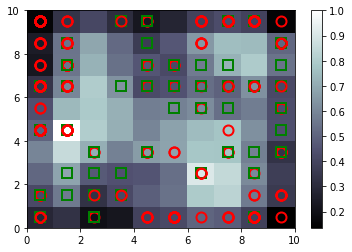

In [15]:
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [17]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,2)], mappings[(1,4)]), axis = 0)
frauds = sc.inverse_transform(frauds)
frauds

array([[  1.56085950e+07,   0.00000000e+00,   3.04200000e+01,
          1.37500000e+00,   2.00000000e+00,   9.00000000e+00,
          8.00000000e+00,   4.00000000e-02,   0.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   3.40000000e+01],
       [  1.57611580e+07,   0.00000000e+00,   1.65000000e+01,
          1.25000000e+00,   2.00000000e+00,   1.10000000e+01,
          4.00000000e+00,   2.50000000e-01,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   1.08000000e+02,   9.90000000e+01],
       [  1.57117420e+07,   0.00000000e+00,   2.30000000e+01,
          1.83500000e+00,   2.00000000e+00,   5.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   2.00000000e+02,   5.40000000e+01],
       [  1.56661660e+07,   0.00000000e+00,   2.00800000e+01,
     

In [18]:
customers = dataset.iloc[:, 1:].values

# Creating the dependent variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [20]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [21]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Epoch 1/2
690/690 [==============================] - 2s 2ms/step - loss: 0.4614 - acc: 0.9696
Epoch 2/2
690/690 [==============================] - 1s 2ms/step - loss: 0.1528 - acc: 0.9710


In [23]:
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]
y_pred

array([[  1.57997850e+07,   2.74724443e-03],
       [  1.56548590e+07,   3.59584996e-03],
       [  1.56214230e+07,   3.91540350e-03],
       ..., 
       [  1.56992380e+07,   2.67855048e-01],
       [  1.56085950e+07,   2.70708919e-01],
       [  1.56647930e+07,   3.08901280e-01]])